# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [3]:
#Importar libreria para leer el aricho 
import pandas as pd

In [4]:
#Cargar el dataset, colocar el tiempo como indice
contrato = pd.read_csv('taxi.csv', parse_dates =[0], index_col=[0])

In [5]:
#Mostar resultados
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
#Mostrar informacion
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


## Análisis

<Axes: xlabel='datetime'>

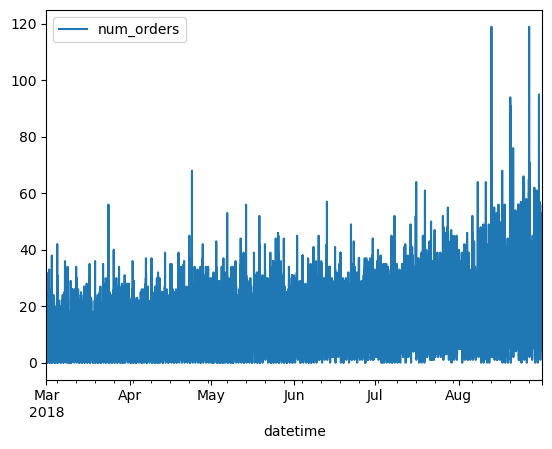

In [8]:
#Graficar la data para analizar los datos
data.plot(kind='line')

In [9]:
#Cambiar la frecuencia de los datos por hora
data_agrupada_por_hora = data.resample('1h').sum()

<Axes: xlabel='datetime'>

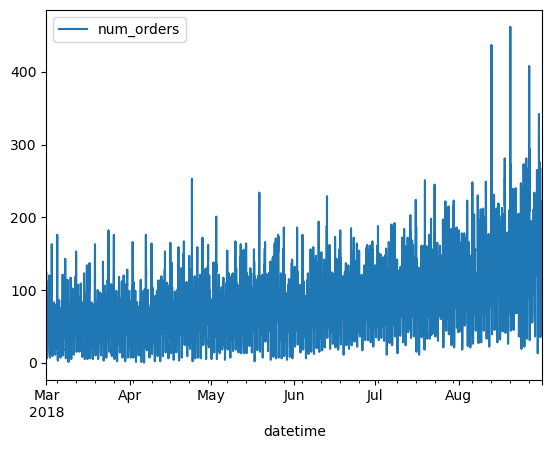

In [10]:
# Graficar data 
data_agrupada_por_hora.plot(kind='line')

### Observaciones
En la grafica se observa que la frecuencia de los datos esta bien marcada es decir tiene una tendecia, como no se visualiza bien clara el patron vamos a graficar los datos agrupados por dias.

In [12]:
#Datos agrupados por dia
data_agrupada_por_dia = data.resample('1d').sum()

<Axes: xlabel='datetime'>

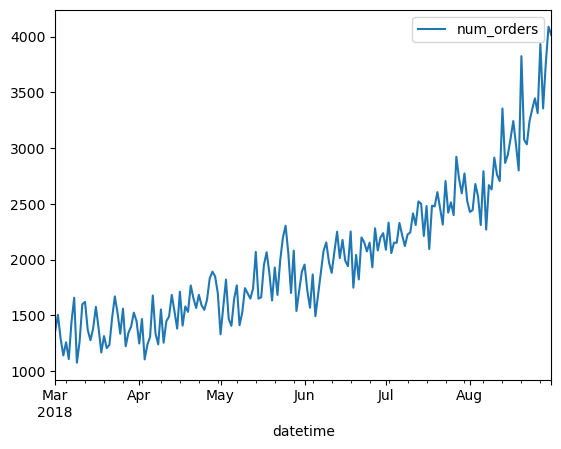

In [13]:
data_agrupada_por_dia.plot(kind='line')

### Observaciones
En el grafico se puede observar que la frecuencia de ordenes van subiendo hasta llevar a su punto mas alto en Agosto.

In [15]:
#Importar librerias para descomponer la estacionalidad y la tendencia. 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

In [16]:
data_descompuesta = seasonal_decompose(data_agrupada_por_hora)

In [17]:
data_descompuesta 

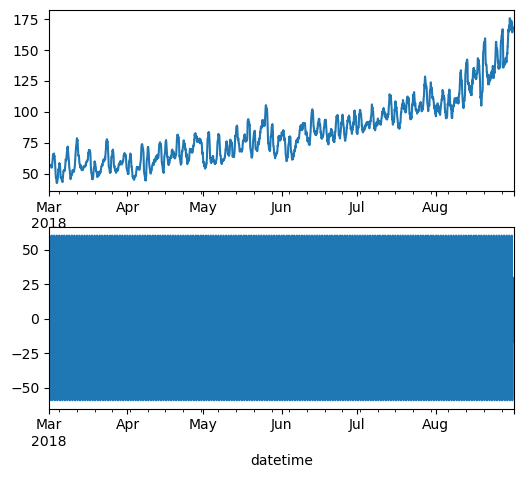

In [18]:
# Graficamos 
plt.figure(figsize=(6,8))
plt.subplot(311)
data_descompuesta.trend.plot(ax= plt.gca())
plt.subplot(312)
data_descompuesta.seasonal.plot(ax=plt.gca())
plt.show()

### Observaciones
Al descomponer los datos se puede visualizar una estacionalidad y una tendencia bien definida para visualizar el patron de mejor manera la estacionalidad se va a filtrar por el indice una fecha especifica.

<Axes: xlabel='datetime'>

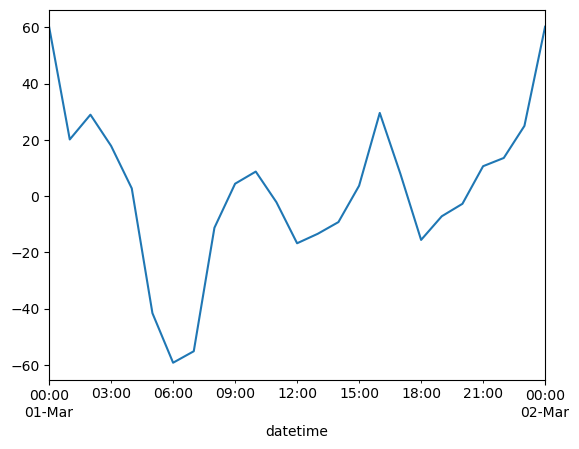

In [20]:
# Imprimir la grafica 
data_descompuesta.seasonal[data_descompuesta.seasonal.index <= '2018-03-02'].plot()

<Axes: xlabel='datetime'>

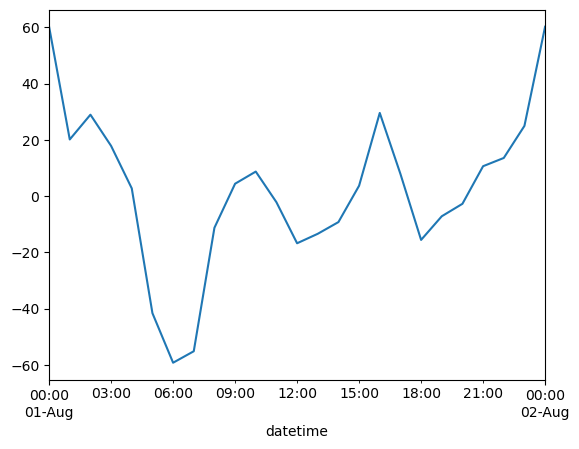

In [21]:
data_descompuesta.seasonal[(data_descompuesta.seasonal.index >= '2018-08-01') & (data_descompuesta.seasonal.index <= '2018-08-02')].plot()

### Observaciones 
Hay horas en el dia que hay mas numero de ordenes al parecer en la madrugada hay bastante afluencia de ordenes y a las 6 am es el punto mas bajo y apartir de ahi en el trascurso del dia va subiendo apesar del mes la tendecia es la misma cada dia.

## Formación

In [24]:
#Creacion de atributos, se va filtrar por mes, dia, hora y dia de la semana .
data_agrupada_por_hora['mes'] = data_agrupada_por_hora.index.month
data_agrupada_por_hora['dia'] = data_agrupada_por_hora.index.day
data_agrupada_por_hora['dia_de_la_semana'] = data_agrupada_por_hora.index.dayofweek
data_agrupada_por_hora['hora'] = data_agrupada_por_hora.index.hour

In [25]:
#Crear un bucle para desplazar el numero de ordenes 
for lag in range(1, 6):
    data_agrupada_por_hora[f'lag_{lag}']= data_agrupada_por_hora['num_orders'].shift(lag)

In [26]:
#Crear la columna donde se calcule la media movil de cada fila
data_agrupada_por_hora['promedio_movil'] = data_agrupada_por_hora['num_orders'].shift().rolling(3).mean()

In [27]:
#Eliminar los datos ausentes que se formaron apartir del desplazamiento
data_agrupada_por_hora.dropna(inplace=True)

In [28]:
data_agrupada_por_hora

,num_orders,mes,dia,dia_de_la_semana,hora,lag_1,lag_2,lag_3,lag_4,lag_5,promedio_movil
datetime,,,,,,,,,,,
2018-03-01 05:00:00,6,3,1,3,5,43.0,66.0,71.0,85.0,124.0,60.000000
2018-03-01 06:00:00,12,3,1,3,6,6.0,43.0,66.0,71.0,85.0,38.333333
2018-03-01 07:00:00,15,3,1,3,7,12.0,6.0,43.0,66.0,71.0,20.333333
2018-03-01 08:00:00,34,3,1,3,8,15.0,12.0,6.0,43.0,66.0,11.000000
2018-03-01 09:00:00,69,3,1,3,9,34.0,15.0,12.0,6.0,43.0,20.333333
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,8,31,4,19,207.0,217.0,197.0,116.0,133.0,207.000000
2018-08-31 20:00:00,154,8,31,4,20,136.0,207.0,217.0,197.0,116.0,186.666667
2018-08-31 21:00:00,159,8,31,4,21,154.0,136.0,207.0,217.0,197.0,165.666667


In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Aplicar One-Hot Encoding a `mes`, `dia` y `hora`
data_agrupada_por_hora_es= pd.get_dummies(data_agrupada_por_hora, columns=['mes', 'dia', 'dia_de_la_semana','hora'], drop_first=True)

# 🎯 Escalar `num_ordenes`, `lags_1`, `media_movil` con StandardScaler
variables_a_escalar = ['num_orders', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'promedio_movil'] 
scaler = StandardScaler()
data_agrupada_por_hora_es[variables_a_escalar] = scaler.fit_transform(data_agrupada_por_hora_es[variables_a_escalar])

In [37]:
#Graficar  
data_agrupada_por_hora_es

,num_orders,lag_1,lag_2,lag_3,lag_4,lag_5,promedio_movil,mes_4,mes_5,mes_6,...,hora_14,hora_15,hora_16,hora_17,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 05:00:00,-1.741553,-0.919808,-0.408365,-0.296788,0.015082,0.883234,-0.641334,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-01 06:00:00,-1.608322,-1.741986,-0.919990,-0.408045,-0.296521,0.015144,-1.211685,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-01 07:00:00,-1.541707,-1.608660,-1.743038,-0.919824,-0.407808,-0.296479,-1.685516,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-01 08:00:00,-1.119810,-1.541997,-1.609571,-1.743122,-0.919727,-0.407772,-1.931205,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-01 09:00:00,-0.342631,-1.119797,-1.542837,-1.609614,-1.743249,-0.919723,-1.685516,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,1.145111,2.724442,2.950563,2.506874,0.705060,1.083562,3.228280,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2018-08-31 20:00:00,1.544803,1.146749,2.728118,2.951900,2.507906,0.705164,2.693027,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2018-08-31 21:00:00,1.655828,1.546727,1.148754,2.729387,2.953053,2.508121,2.140225,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Prueba

In [33]:
#Importar la libreria para particionar lo datos y hacer la prueba del modelo 
from sklearn.model_selection import train_test_split 

In [99]:
# Primera división: separar entrenamiento + validación (90%) y prueba (10%)
train_valid_es, test_es = train_test_split(data_agrupada_por_hora_es, shuffle=False, test_size=0.1)

# Segunda división: separar entrenamiento (90%) y validación (10%) dentro de train_valid
train_es, valid_es = train_test_split(train_valid_es, shuffle=False, test_size=0.1)

In [101]:
# Imprimir los datos de entrenamiento 
train_es

,num_orders,lag_1,lag_2,lag_3,lag_4,lag_5,promedio_movil,mes_4,mes_5,mes_6,...,hora_14,hora_15,hora_16,hora_17,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 05:00:00,-1.741553,-0.919808,-0.408365,-0.296788,0.015082,0.883234,-0.641334,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-01 06:00:00,-1.608322,-1.741986,-0.919990,-0.408045,-0.296521,0.015144,-1.211685,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-01 07:00:00,-1.541707,-1.608660,-1.743038,-0.919824,-0.407808,-0.296479,-1.685516,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-01 08:00:00,-1.119810,-1.541997,-1.609571,-1.743122,-0.919727,-0.407772,-1.931205,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-01 09:00:00,-0.342631,-1.119797,-1.542837,-1.609614,-1.743249,-0.919723,-1.685516,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 20:00:00,1.034085,0.035697,-0.185919,1.683577,1.728898,0.638388,0.604664,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2018-07-27 21:00:00,1.078495,1.035643,0.036526,-0.185532,1.684384,1.729065,0.350200,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2018-07-27 22:00:00,2.854904,1.080086,1.037531,0.036981,-0.185234,1.684548,0.850354,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [45]:
#Imprimir los datos de validacion
valid_es

,num_orders,lag_1,lag_2,lag_3,lag_4,lag_5,promedio_movil,mes_4,mes_5,mes_6,...,hora_14,hora_15,hora_16,hora_17,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23
datetime,,,,,,,,,,,,,,,,,,,,,
2018-07-28 01:00:00,2.455212,2.391127,0.837330,2.862895,1.083435,1.039045,2.403464,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-07-28 02:00:00,1.344957,2.457790,2.394449,0.838028,2.864023,1.083562,2.245521,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-07-28 03:00:00,1.056290,1.346738,2.461183,2.395618,0.838604,2.864260,2.447337,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-07-28 04:00:00,2.899314,1.057864,1.348955,2.462372,2.396619,0.838716,1.920859,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-07-28 05:00:00,0.145881,2.902211,1.059776,1.349807,2.463391,2.396827,2.096352,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-13 09:00:00,1.167316,0.146802,-1.008968,-0.408045,-0.029433,1.306150,-0.500940,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-08-13 10:00:00,1.589213,1.168970,0.147749,-1.008829,-0.407808,-0.029374,0.122059,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-08-13 11:00:00,1.322752,1.591169,1.170999,0.148238,-1.008756,-0.407772,1.148691,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
#Imprimir los datos de prueba
test_es

,num_orders,lag_1,lag_2,lag_3,lag_4,lag_5,promedio_movil,mes_4,mes_5,mes_6,...,hora_14,hora_15,hora_16,hora_17,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-13 14:00:00,0.390137,0.768991,0.169994,1.327556,1.595354,1.172597,0.894227,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2018-08-13 15:00:00,2.011110,0.391233,0.770597,0.170489,1.328266,1.595513,0.525692,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2018-08-13 16:00:00,1.322752,2.013369,0.392439,0.771274,0.170884,1.328408,1.253987,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2018-08-13 17:00:00,1.500392,1.324517,2.016292,0.393002,0.771832,0.170955,1.473353,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2018-08-13 18:00:00,0.434547,1.502285,1.326711,2.017346,0.393457,0.771940,1.912085,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,1.145111,2.724442,2.950563,2.506874,0.705060,1.083562,3.228280,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2018-08-31 20:00:00,1.544803,1.146749,2.728118,2.951900,2.507906,0.705164,2.693027,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2018-08-31 21:00:00,1.655828,1.546727,1.148754,2.729387,2.953053,2.508121,2.140225,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [105]:
#Separar los atributos y el objetivo por cada conjunto de datos 
features_train_es = train_es.drop(['num_orders'], axis=1)
target_train_es = train_es['num_orders']
features_valid_es = valid_es.drop(['num_orders'], axis=1)
target_valid_es = valid_es['num_orders']
features_test_es = test_es.drop(['num_orders'], axis=1)
target_test_es = test_es['num_orders']

In [107]:
#Importar librerias para entrenar el modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [109]:
modelo_rl = LinearRegression()

In [111]:
#Entrenar el modelo de Regresion Lineal 
modelo_rl.fit(features_train_es, target_train_es)

LinearRegression()

In [113]:
#Realizar las predicion del conjunto de prueba 
pred_test = modelo_rl.predict(features_test_es)

In [115]:
print(f'El error del modelo en datos de prueba es de: {mean_squared_error(target_test_es, pred_test)** 0.5}') 

El error del modelo en datos de prueba es de: 1.5524096827188105


In [61]:
#Probar con el modelo de Bosque de Refresion 
from sklearn.ensemble import RandomForestRegressor

In [117]:
#Separar los conjunto pero con los datos sin escalar
train_valid, test = train_test_split( data_agrupada_por_hora, shuffle=False, test_size=0.1)

In [119]:
train, valid =train_test_split(train_valid, shuffle=False, test_size=0.1)

In [121]:
train

,num_orders,mes,dia,dia_de_la_semana,hora,lag_1,lag_2,lag_3,lag_4,lag_5,promedio_movil
datetime,,,,,,,,,,,
2018-03-01 05:00:00,6,3,1,3,5,43.0,66.0,71.0,85.0,124.0,60.000000
2018-03-01 06:00:00,12,3,1,3,6,6.0,43.0,66.0,71.0,85.0,38.333333
2018-03-01 07:00:00,15,3,1,3,7,12.0,6.0,43.0,66.0,71.0,20.333333
2018-03-01 08:00:00,34,3,1,3,8,15.0,12.0,6.0,43.0,66.0,11.000000
2018-03-01 09:00:00,69,3,1,3,9,34.0,15.0,12.0,6.0,43.0,20.333333
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 20:00:00,131,7,27,4,20,86.0,76.0,160.0,162.0,113.0,107.333333
2018-07-27 21:00:00,133,7,27,4,21,131.0,86.0,76.0,160.0,162.0,97.666667
2018-07-27 22:00:00,213,7,27,4,22,133.0,131.0,86.0,76.0,160.0,116.666667


In [123]:
#Separar los atributos y el objetivo por cada conjunto de datos 
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_valid = valid.drop(['num_orders'], axis=1)
target_valid = valid['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [125]:
#Entrenar el modelo 
model = RandomForestRegressor(n_estimators= 100, max_depth= None, verbose = True, n_jobs=4)
model.fit(features_train, target_train)
pred_test =  model.predict(features_test)
print(f'El error del modelo en datos de prueba es de: {mean_squared_error(target_test, pred_test)** 0.5}') 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s


El error del modelo en datos de prueba es de: 52.87519867425208


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [131]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# One-Hot para los datos pero en el modelo CatBoostRegressor
data_agrupada_por_hora_oh= pd.get_dummies(data_agrupada_por_hora, columns=['mes', 'dia', 'dia_de_la_semana','hora'], drop_first=True)
#Separar los conjunto pero con los datos sin escalar
train_valid_oh, test_oh = train_test_split( data_agrupada_por_hora_oh , shuffle=False, test_size=0.1)
train_oh, valid_oh =train_test_split(train_valid_oh, shuffle=False, test_size=0.1)
#Separar los atributos y el objetivo por cada conjunto de datos 
features_train_oh = train_oh.drop(['num_orders'], axis=1)
target_train_oh = train_oh['num_orders']
features_valid_oh = valid_oh.drop(['num_orders'], axis=1)
target_valid_oh = valid_oh['num_orders']
features_test_oh = test_oh.drop(['num_orders'], axis=1)
target_test_oh = test_oh['num_orders']
# Definir el modelo con parámetros básicos
modelo = CatBoostRegressor(iterations=10000, learning_rate=0.05, depth=7, l2_leaf_reg=3)
modelo.fit(features_train, target_train,eval_set=(features_test, target_test), verbose=100)

# Hacer predicciones
pred_test_ct = modelo.predict(features_test)

# Evaluar el rendimiento con RMSE
print(f'El error del modelo en datos de prueba es de: {mean_squared_error(target_test, pred_test_ct)** 0.5}') 


0:	learn: 35.2974318	test: 86.3836062	best: 86.3836062 (0)	total: 5.18ms	remaining: 51.9s
100:	learn: 20.3086563	test: 57.8256850	best: 57.8256850 (100)	total: 413ms	remaining: 40.5s
200:	learn: 17.9668864	test: 55.7533023	best: 55.7517880 (199)	total: 846ms	remaining: 41.2s
300:	learn: 16.3494663	test: 55.7440614	best: 55.5738591 (271)	total: 1.27s	remaining: 40.8s
400:	learn: 15.1887485	test: 55.8065875	best: 55.5738591 (271)	total: 1.63s	remaining: 38.9s
500:	learn: 14.1917576	test: 55.9470931	best: 55.5738591 (271)	total: 2.03s	remaining: 38.5s
600:	learn: 13.3244492	test: 56.0848287	best: 55.5738591 (271)	total: 2.68s	remaining: 42s
700:	learn: 12.5126543	test: 56.2525462	best: 55.5738591 (271)	total: 3.08s	remaining: 40.8s
800:	learn: 11.8659443	test: 56.3340783	best: 55.5738591 (271)	total: 3.45s	remaining: 39.6s
900:	learn: 11.1948243	test: 56.4356116	best: 55.5738591 (271)	total: 3.79s	remaining: 38.2s
1000:	learn: 10.6619146	test: 56.5362179	best: 55.5738591 (271)	total: 4.12

In [136]:
from statsmodels.tsa.arima.model import ARIMA

# 📌 Ajustar el modelo ARIMA
modelo_arima = ARIMA(train['num_orders'], order=(2,1,2))  # Parámetros p=2, d=1, q=2
modelo_fit = modelo_arima.fit()

# 📌 Predicciones en el conjunto de prueba
predicciones_test = modelo_fit.forecast(steps=len(test))

# 📌 Evaluar el error con RMSE
import numpy as np

rmse_test = np.sqrt(mean_squared_error(test['num_orders'], predicciones_test))
print(f"✅ RMSE del modelo ARIMA en conjunto de prueba: {rmse_test:.4f}")

✅ RMSE del modelo ARIMA en conjunto de prueba: 68.0936


## Conclusion 
La Regresion Lineal es el modelo con mejor RCME de los datos de prueba que el resto de modelos apesar de ir ajustando los hiperparametros, el error cuadratico medio del modelo de Bosque de Regresion, CatBosstRegression, ARIMA superan el umbral de 48 que el proyecto establece, y tienen un gasto computacional mas grande. 

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48